In [317]:
import pandas as pd
import numpy as np

In [458]:
final = pd.read_csv("finaldata.csv")

In [319]:
dct= {}
for index in range(2008,2016,1):
    dct['final_%s' % index] = final.loc[final["season"]==index]

In [320]:
final_2008 = dct["final_2008"]
final_2009 = dct["final_2009"]
final_2010 = dct["final_2010"]
final_2011 = dct["final_2011"]
final_2012 = dct["final_2012"]
final_2013 = dct["final_2013"]
final_2014 = dct["final_2014"] 
final_2015 = dct["final_2015"]

In [321]:
x_2008 = final_2008.drop(["winning_team","season"],axis=1)
y_2008 = final_2008["winning_team"]
x_2009 = final_2009.drop(["winning_team","season"],axis=1)
y_2009 = final_2009["winning_team"]
x_2010 = final_2010.drop(["winning_team","season"],axis=1)
y_2010 = final_2010["winning_team"]
x_2011 = final_2011.drop(["winning_team","season"],axis=1)
y_2011 = final_2011["winning_team"]
x_2012 = final_2012.drop(["winning_team","season"],axis=1)
y_2012 = final_2012["winning_team"]
x_2013 = final_2013.drop(["winning_team","season"],axis=1)
y_2013 = final_2013["winning_team"]
x_2014 = final_2014.drop(["winning_team","season"],axis=1)
y_2014 = final_2014["winning_team"]
x_2015 = final_2015.drop(["winning_team","season"],axis=1)
y_2015 = final_2015["winning_team"]

# Random Forest Classifier

In [322]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [405]:
params = {"max_depth": [1,2,3],
          "n_estimators": [5,10,15,20],
          "criterion": ["gini","entropy"],
          "class_weight": [{1:r} for r in [1,1.1,1.2,1.3]]}

In [406]:
from sklearn.model_selection import GridSearchCV

In [407]:
gridsearch = GridSearchCV(param_grid = params, cv = 3, estimator = rf, scoring = "roc_auc",verbose=1,n_jobs=3)

In [408]:
gridsearch.fit(x_2008,y_2008)
print("best parameters are:", gridsearch.best_params_)
print("best score is:", gridsearch.best_score_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    5.2s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   22.1s


best parameters are: {'class_weight': {1: 1}, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 5}
best score is: 0.44714696223316913


[Parallel(n_jobs=3)]: Done 288 out of 288 | elapsed:   33.1s finished
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [409]:
##Instantiate rf with parameters from above 
rf = RandomForestClassifier(criterion = "gini", max_depth = 3, n_estimators = 5,random_state=123)

In [410]:
##Create rf fits for all years
##Predicted variables
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, accuracy_score
##Calculate accuracy score
#2009
rf2009 = rf.fit(x_2008,y_2008)
yhat_2009 = rf2009.predict(x_2009)
report_2009 = accuracy_score(y_2009,yhat_2009)
#2010
rf2010 = rf.fit(x_2009,y_2009)
yhat_2010 = rf2010.predict(x_2010)
report_2010 = accuracy_score(y_2010,yhat_2010)
#2011
rf2011 = rf.fit(x_2010,y_2010)
yhat_2011 = rf2011.predict(x_2011)
report_2011 = accuracy_score(y_2011,yhat_2011)
#2012
rf2012 = rf.fit(x_2011,y_2011)
yhat_2012 = rf2012.predict(x_2012)
report_2012 = accuracy_score(y_2012,yhat_2012)
#2013
rf2013 = rf.fit(x_2012,y_2012)
yhat_2013 = rf2013.predict(x_2013)
report_2013 = accuracy_score(y_2013,yhat_2013)
#2014
rf2014 = rf.fit(x_2013,y_2013)
yhat_2014 = rf2014.predict(x_2014)
report_2014 = accuracy_score(y_2014,yhat_2014)
#2015
rf2015 = rf.fit(x_2013,y_2013)
yhat_2015 = rf2015.predict(x_2015)
report_2015 = accuracy_score(y_2015,yhat_2015)

Confusion matrix, without normalization
[[15 19]
 [20 20]]


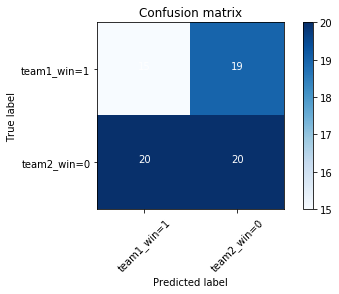

In [411]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_2012, yhat_2012, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['team1_win=1','team2_win=0'],normalize= False,  title='Confusion matrix')

In [412]:
rfscores = [report_2009,report_2010,report_2011,report_2012,report_2013,report_2014,report_2015]

# Logistic Regression

In [413]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [414]:
params = {"penalty": ["l1", "l2"],
          "C": [0.5,1,1,5],
          "class_weight": [{1:w} for w in [1,1.1,1.2,1.3]]}

In [415]:
gridsearch = GridSearchCV(param_grid = params, estimator = lr, cv = 3, scoring = "roc_auc", verbose=1, n_jobs = 3)

In [334]:
gridsearch.fit(x_2008,y_2008)
print("best parameters are:", gridsearch.best_params_)
print("best score is:", gridsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    3.8s


best parameters are: {'C': 0.5, 'class_weight': {1: 1.2}, 'penalty': 'l1'}
best score is: 0.6320812807881773


[Parallel(n_jobs=3)]: Done  96 out of  96 | elapsed:    6.8s finished
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [416]:
##Instantiate regressor with above parameters
lr = LogisticRegression(C = 0.5, class_weight = {1: 1.3}, penalty = 'l1')

In [417]:
##Fit regressor
##Calculate predicted values
#Calcuate accuracy scores
#2009
lr2009 = lr.fit(x_2008,y_2008)
yhat_2009 = lr2009.predict(x_2009)
lrs_2009 = accuracy_score(y_2009,yhat_2009)
#2010
lr2010 = lr.fit(x_2009,y_2009)
yhat_2010 = lr2010.predict(x_2010)
lrs_2010 = accuracy_score(y_2010,yhat_2010)
#2011
lr2011 = lr.fit(x_2010,y_2010)
yhat_2011 = lr2011.predict(x_2011)
lrs_2011 = accuracy_score(y_2011,yhat_2011)
#2012
lr2012 = lr.fit(x_2011,y_2011)
yhat_2012= lr2012.predict(x_2012)
lrs_2012 = accuracy_score(y_2012,yhat_2012)
#2013
lr2013 = lr.fit(x_2012,y_2012)
yhat_2013 = lr2013.predict(x_2013)
lrs_2013 = accuracy_score(y_2013,yhat_2013)
#2014
lr2014 = lr.fit(x_2013,y_2013)
yhat_2014 = lr2014.predict(x_2014)
lrs_2014 = accuracy_score(y_2014,yhat_2014)
#2015
lr2015 = lr.fit(x_2013,y_2013)
yhat_2015 = lr2015.predict(x_2015)
lrs_2015 = accuracy_score(y_2015,yhat_2015)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

In [418]:
lrs = [lrs_2009,lrs_2010,lrs_2011,lrs_2012,lrs_2013,lrs_2014,lrs_2015]

# Decision Tree

In [419]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [420]:
params = params = {"max_depth": [1,2,3,4],
          "criterion": ["entropy","gini"],
          "splitter": ["best","random"],
           "class_weight": [{1:w} for w in [1,1.1,1.2,1.3]]}

In [340]:
gridsearch = gridsearch = GridSearchCV(param_grid = params, estimator = dt, cv = 3, scoring = "roc_auc", verbose=1, n_jobs = 3)

In [421]:
gridsearch.fit(x_2008,y_2008)
print("best parameters are:", gridsearch.best_params_)
print("best score is:", gridsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.9s


best parameters are: {'C': 0.5, 'class_weight': {1: 1.3}, 'penalty': 'l1'}
best score is: 0.6301313628899835


[Parallel(n_jobs=3)]: Done  96 out of  96 | elapsed:    5.7s finished
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [422]:
#Instantiate classifier with above parameters
dt = DecisionTreeClassifier(criterion = "entropy", max_depth=1, splitter = "random", class_weight = {1:1})

In [423]:
#Fit classifier
##Predict values
##Calculate accuracy
#2009
dt2009 = dt.fit(x_2008,y_2008)
yhat_2009 = dt2009.predict(x_2009)
dts_2009 = accuracy_score(y_2009,yhat_2009)
#2010
dt2010 = dt.fit(x_2009,y_2009)
yhat_2010 = dt2010.predict(x_2010)
dts_2010 = accuracy_score(y_2010,yhat_2010)
#2011
dt2011 = dt.fit(x_2010,y_2010)
yhat_2011 = dt2011.predict(x_2011)
dts_2011 = accuracy_score(y_2011,yhat_2011)
#2012
dt2012 = dt.fit(x_2011,y_2011)
yhat_2012= dt2012.predict(x_2012)
dts_2012 = accuracy_score(y_2012,yhat_2012)
#2013
dt2013 = dt.fit(x_2012,y_2012)
yhat_2013 = dt2013.predict(x_2013)
dts_2013 = accuracy_score(y_2013,yhat_2013)
#2014
dt2014 = dt.fit(x_2013,y_2013)
yhat_2014 = dt2014.predict(x_2014)
dts_2014 = accuracy_score(y_2014,yhat_2014)
#2015
dt2015 = dt.fit(x_2013,y_2013)
yhat_2015 = dt2015.predict(x_2015)
dts_2015 = accuracy_score(y_2015,yhat_2015)

In [424]:
dts = [dts_2009,dts_2010,dts_2011,dts_2012,dts_2013,dts_2014,dts_2015]

# XGBClassifier

In [346]:
##Import XGBoost
#!pip3 install xgboost

In [425]:
from xgboost import XGBClassifier
#Instantiate classiifier
gbm = XGBClassifier()

In [426]:
param = {"max_depth": [1,2,3],
         "learning_rate": [0.1,0.01,0.001],
         "colsample_bytree": [0.4,0.5],
         "n_estimators": [70],
         "reg_lambda": [4,5],
         "reg_alpha": [1,2,3]}

In [349]:
gridsearch = GridSearchCV(param_grid = param,estimator=gbm, scoring="roc_auc", cv=4,verbose=1,n_jobs=3)

In [350]:
gridsearch.fit(x_2008,y_2008)
print("Best roc_auc score is", gridsearch.best_score_)
print("Best parameters are", gridsearch.best_params_)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   29.3s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   46.6s
[Parallel(n_jobs=3)]: Done 432 out of 432 | elapsed:  1.2min finished
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best roc_auc score is 0.5281609195402299
Best parameters are {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 70, 'reg_alpha': 1, 'reg_lambda': 4}


In [427]:
gbm = XGBClassifier(colsample_bytree=0.5,learning_rate=0.1,max_depth=1,n_estimators=70,reg_aplha=1,reg_lambda=4,objective="binary:hinge",verbose=1,scale_pos_weight=1)

In [428]:
##Fit data
##Predict values
##Calculate score
#2009
gbm_2009 = gbm.fit(x_2008,y_2008)
yhat_2009 = gbm_2009.predict(x_2009)
gbms_2009 = accuracy_score(y_2009,yhat_2009)
#2010
gbm_2010 = gbm.fit(x_2009,y_2009)
yhat_2010 = gbm_2010.predict(x_2010)
gbms_2010 = accuracy_score(y_2010,yhat_2010)
#2011
gbm_2011 = gbm.fit(x_2010,y_2010)
yhat_2011 = gbm_2011.predict(x_2011)
gbms_2011 = accuracy_score(y_2011,yhat_2011)
#2012
gbm_2012 = gbm.fit(x_2011,y_2011)
yhat_2012 = gbm_2012.predict(x_2012)
gbms_2012 = accuracy_score(y_2012,yhat_2012)
#2013
gbm_2013 = gbm.fit(x_2012,y_2012)
yhat_2013 = gbm_2013.predict(x_2013)
gbms_2013 = accuracy_score(y_2013,yhat_2013)
#2014
gbm_2014 = gbm.fit(x_2012,y_2012)
yhat_2014 = gbm_2014.predict(x_2014)
gbms_2014 = accuracy_score(y_2014,yhat_2014)
#2015
gbm_2015 = gbm.fit(x_2013,y_2013)
yhat_2015 = gbm_2015.predict(x_2015)
gbms_2015 = accuracy_score(y_2015,yhat_2015)

[22:59:06] WARNING: /workspace/src/learner.cc:480: 
Parameters: { reg_aplha, scale_pos_weight, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:59:06] WARNING: /workspace/src/learner.cc:480: 
Parameters: { reg_aplha, scale_pos_weight, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:59:07] WARNING: /workspace/src/learner.cc:480: 
Parameters: { reg_aplha, scale_pos_weight, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not

Confusion matrix, without normalization
[[ 2 21]
 [ 5 32]]


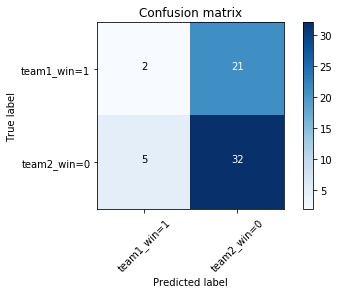

In [429]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_2014, yhat_2014, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['team1_win=1','team2_win=0'],normalize= False,  title='Confusion matrix')

In [430]:
gbms = [gbms_2009,gbms_2010,gbms_2011,gbms_2012,gbms_2013,gbms_2014,gbms_2015]

# Results

In [431]:
seasons = list(range(2009,2016,1))
results = pd.DataFrame(seasons)
results.reset_index
results.rename(columns={0:"Season"},inplace=True)
results["Random Forest Classifer Accuracy"] = rfscores
results["Linear Regression Accuracy"] = lrs
results["Decision Tree Accuracy"] = dts
results["XGBClassifier Accuracy"] = gbms
results.set_index("Season",inplace=True)
results

,Random Forest Classifer Accuracy,Linear Regression Accuracy,Decision Tree Accuracy,XGBClassifier Accuracy
Season,,,,
2009,0.508772,0.456140,0.526316,0.526316
2010,0.433333,0.516667,0.533333,0.583333
2011,0.555556,0.430556,0.430556,0.430556
2012,0.472973,0.432432,0.540541,0.540541
2013,0.460526,0.552632,0.605263,0.565789
2014,0.533333,0.583333,0.616667,0.566667
2015,0.508772,0.578947,0.438596,0.578947


Text(0, 0.5, 'Accuracy')

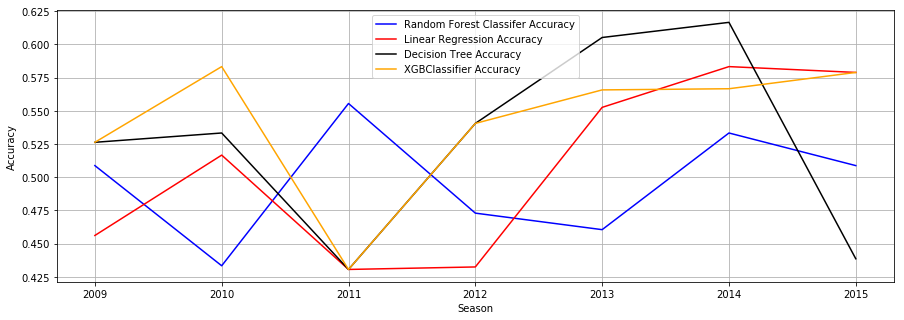

In [432]:
results.plot(kind="line",color=["blue","red","black","orange"],figsize=(15,5))
plt.grid()
plt.ylabel("Accuracy")

In [433]:
results.describe()

,Random Forest Classifer Accuracy,Linear Regression Accuracy,Decision Tree Accuracy,XGBClassifier Accuracy
count,7.000000,7.000000,7.000000,7.000000
mean,0.496181,0.507244,0.527325,0.541736
std,0.042783,0.067292,0.072463,0.053097
min,0.433333,0.430556,0.430556,0.430556
25%,0.466750,0.444286,0.482456,0.533428
50%,0.508772,0.516667,0.533333,0.565789
75%,0.521053,0.565789,0.572902,0.572807
max,0.555556,0.583333,0.616667,0.583333


In [358]:
hw_2009 = (y_2009.loc[y_2009==1].count())/len(y_2009)    
hw_2010 = y_2010.loc[y_2010==1].count()/len(y_2010)
hw_2011 = y_2011.loc[y_2011==1].count()/len(y_2011)
hw_2012 = y_2012.loc[y_2012==1].count()/len(y_2012)
hw_2013 = y_2013.loc[y_2013==1].count()/len(y_2013)
hw_2014 = y_2014.loc[y_2014==1].count()/len(y_2014)
hw_2015 = y_2015.loc[y_2015==1].count()/len(y_2015)
hw = ([hw_2009,hw_2010,hw_2011,hw_2012,hw_2013,hw_2014,hw_2015])
aw_2009 = y_2009.loc[y_2009==0].count()    
aw_2010 = y_2010.loc[y_2010==0].count()
aw_2011 = y_2011.loc[y_2011==0].count()
aw_2012 = y_2012.loc[y_2012==0].count()
aw_2013 = y_2013.loc[y_2013==0].count()
aw_2014 = y_2014.loc[y_2014==0].count()
aw_2015 = y_2015.loc[y_2015==0].count()
aw = ([aw_2009,aw_2010,aw_2011,aw_2012,aw_2013,aw_2014,aw_2015])

In [359]:
homewins = pd.DataFrame(hw,seasons)
homewins.reset_index(inplace=True)
homewins.rename(columns={0:"Home Wins","index":"Seasons"},inplace=True)
homewins.set_index("Seasons",inplace=True)
awaywins = pd.DataFrame(aw,seasons)
awaywins.reset_index(inplace=True)
awaywins.rename(columns={0:"Away Wins","index":"Seasons"},inplace=True)
awaywins.set_index("Seasons",inplace=True)

In [ ]:
homewins.plot(kind="line")
plt.grid()

# 2019 Prediction

In [ ]:
final_train = final.drop(final.loc[final["season"]==2019].index)
final_test = final[final["season"]==2019]
x_train = final_train.drop(["season","winning_team"],axis=1)
x_test = final_test.drop(["season","winning_team"],axis=1)
y_train = final_train["winning_team"]
y_test = final_test["winning_team"]

# Random Forest Classifier

In [434]:
params = {"max_depth": [1,2,3],
          "n_estimators": [5,10,15,20,70],
          "criterion": ["gini","entropy"],
          "class_weight": [{1:w} for w in [1.0,1.1,1.2,1.3]]}

In [435]:
gridsearch = GridSearchCV(param_grid = params, cv = 3, estimator = rf, scoring = "roc_auc",verbose=1,n_jobs=3)

In [436]:
gridsearch.fit(x_train,y_train)
print("best parameters are:", gridsearch.best_params_)
print("best score is:", gridsearch.best_score_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   10.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   39.0s


best parameters are: {'class_weight': {1: 1.1}, 'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 15}
best score is: 0.5695159499293359


[Parallel(n_jobs=3)]: Done 360 out of 360 | elapsed:  1.2min finished


In [439]:
##Instantiate rf with parameters from above 
rf = RandomForestClassifier(criterion = "entropy", max_depth = 3, n_estimators = 15,random_state=123,class_weight = {1:1.1})

In [440]:
rf.fit(x_train,y_train)
yhat = rf.predict(x_test)
report_RF = accuracy_score(y_test,yhat)

# Logistic Regression

In [441]:
params = {"penalty": ["l1", "l2"],
          "C": [0.5,1,1,5],
          "class_weight": [{1:w} for w in [1.0,1.1,1.2,1.3]]}

In [442]:
gridsearch = GridSearchCV(param_grid = params, estimator = lr, cv = 3, scoring = "roc_auc", verbose=1, n_jobs = 3)

In [443]:
gridsearch.fit(x_train,y_train)
print("best parameters are:", gridsearch.best_params_)
print("best score is:", gridsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    5.4s


best parameters are: {'C': 5, 'class_weight': {1: 1.0}, 'penalty': 'l2'}
best score is: 0.5611750454270139


[Parallel(n_jobs=3)]: Done  96 out of  96 | elapsed:   11.6s finished
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [444]:
##Instantiate regressor with above parameters
lr = LogisticRegression(C = 5, penalty = 'l2')

In [445]:
lr.fit(x_train,y_train)
yhat = lr.predict(x_test)
report_lr = accuracy_score(y_test,yhat)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Decision Tree

In [446]:
params = params = {"max_depth": [1,2,3,4],
          "criterion": ["entropy","gini"],
          "splitter": ["best","random"],
          "class_weight": [{1:w} for w in [1.0,1.1,1.2,1.3]]}

In [447]:
gridsearch = gridsearch = GridSearchCV(param_grid = params, estimator = dt, cv = 3, scoring = "roc_auc", verbose=1, n_jobs = 3)

In [448]:
gridsearch.fit(x_train,y_train)
print("best parameters are:", gridsearch.best_params_)
print("best score is:", gridsearch.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  82 tasks      | elapsed:    4.5s


best parameters are: {'class_weight': {1: 1.3}, 'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
best score is: 0.5156344639612356


[Parallel(n_jobs=3)]: Done 192 out of 192 | elapsed:   10.7s finished


In [449]:
#Instantiate classifier with above parameters
dt = DecisionTreeClassifier(criterion = "gini", max_depth=4, splitter = "best",class_weight = {1:1.3})

In [450]:
dt.fit(x_train,y_train)
yhat = dt.predict(x_test)
report_dt = accuracy_score(y_test,yhat)

# XGBClassifier

In [451]:
param = {"max_depth": [1,2,3],
         "learning_rate": [0.1,0.01,0.001],
         "colsample_bytree": [0.4,0.5],
         "n_estimators": [70],
         "reg_lambda": [4,5],
         "reg_alpha": [1,2,3]}

In [452]:
gridsearch = GridSearchCV(param_grid = param,estimator=gbm, scoring="roc_auc", cv=4,verbose=1,n_jobs=3)

In [453]:
gridsearch.fit(x_train,y_train)
print("Best roc_auc score is", gridsearch.best_score_)
print("Best parameters are", gridsearch.best_params_)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   15.6s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   51.9s
[Parallel(n_jobs=3)]: Done 432 out of 432 | elapsed:  1.9min finished


[23:06:46] WARNING: /workspace/src/learner.cc:480: 
Parameters: { reg_aplha, scale_pos_weight, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best roc_auc score is 0.5677472137998454
Best parameters are {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 70, 'reg_alpha': 2, 'reg_lambda': 5}


In [454]:
gbm = XGBClassifier(colsample_bytree=0.5,learning_rate=0.1,max_depth=3,n_estimators=70,reg_aplha=2,reg_lambda=5,objective="binary:hinge",verbose=1)

In [455]:
gbm.fit(x_train,y_train)
yhat = gbm.predict(x_test)
report_xgb = accuracy_score(y_test,yhat)

[23:07:42] WARNING: /workspace/src/learner.cc:480: 
Parameters: { reg_aplha, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [456]:
scores = [report_RF,report_lr,report_dt,report_xgb]

final_results = pd.DataFrame(scores).transpose()
final_results.columns=["Random Forest", "Logistic Regression", "Decision Tree Classifier", "XGBClassifer"]
final_results.head()

,Random Forest,Logistic Regression,Decision Tree Classifier,XGBClassifer
0,0.644068,0.59322,0.627119,0.627119


Confusion matrix, without normalization
[[ 6 17]
 [ 5 31]]


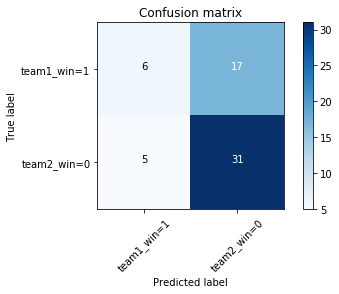

In [457]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['team1_win=1','team2_win=0'],normalize= False,  title='Confusion matrix')